In [18]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.cuda.is_available()

True

In [32]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim * 2)  # Latent mean and log variance
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )

    def reparameterize(self, mu, log_var):
        # Reparameterization trick: z = mu + std * eps
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # Encode
        encoded = self.encoder(x)
        mu, log_var = torch.chunk(encoded, 2, dim=1)
        z = self.reparameterize(mu, log_var)

        # Decode
        reconstructed = self.decoder(z)
        return reconstructed, mu, log_var

In [35]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# Prepare data for training
dataset = TensorDataset(y)  # y = cos(x)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Model and optimizer
vae = VAE(input_dim=1, latent_dim=2)  # Latent dimension = 2
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Loss function
def loss_function(reconstructed, original, mu, log_var):
    # Reconstruction loss (MSE)
    recon_loss = nn.MSELoss()(reconstructed, original)
    # KL divergence
    kl_div = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return recon_loss + kl_div / original.size(0)

# Training loop
num_epochs = 1000
vae.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        batch_y = batch[0]
        optimizer.zero_grad()

        # Forward pass
        reconstructed, mu, log_var = vae(batch_y)
        loss = loss_function(reconstructed, batch_y, mu, log_var)

        # Backward pass
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 2.4851
Epoch 2, Loss: 2.1635
Epoch 3, Loss: 2.0366
Epoch 4, Loss: 2.0068
Epoch 5, Loss: 2.0644
Epoch 6, Loss: 2.0457
Epoch 7, Loss: 2.0826
Epoch 8, Loss: 2.0491
Epoch 9, Loss: 2.0856
Epoch 10, Loss: 2.0110
Epoch 11, Loss: 1.9442
Epoch 12, Loss: 2.0239
Epoch 13, Loss: 2.0697
Epoch 14, Loss: 2.0711
Epoch 15, Loss: 1.9933
Epoch 16, Loss: 2.0065
Epoch 17, Loss: 1.9846
Epoch 18, Loss: 2.0781
Epoch 19, Loss: 2.0203
Epoch 20, Loss: 1.9907
Epoch 21, Loss: 1.9509
Epoch 22, Loss: 2.0358
Epoch 23, Loss: 2.0234
Epoch 24, Loss: 2.0830
Epoch 25, Loss: 1.9433
Epoch 26, Loss: 2.0642
Epoch 27, Loss: 1.9749
Epoch 28, Loss: 1.9912
Epoch 29, Loss: 2.0396
Epoch 30, Loss: 1.9340
Epoch 31, Loss: 2.0178
Epoch 32, Loss: 2.0588
Epoch 33, Loss: 2.0410
Epoch 34, Loss: 1.9963
Epoch 35, Loss: 2.0512
Epoch 36, Loss: 2.0557
Epoch 37, Loss: 2.0273
Epoch 38, Loss: 1.9999
Epoch 39, Loss: 2.0456
Epoch 40, Loss: 2.0499
Epoch 41, Loss: 2.0266
Epoch 42, Loss: 2.0020
Epoch 43, Loss: 1.9906
Epoch 44, Loss: 2.03

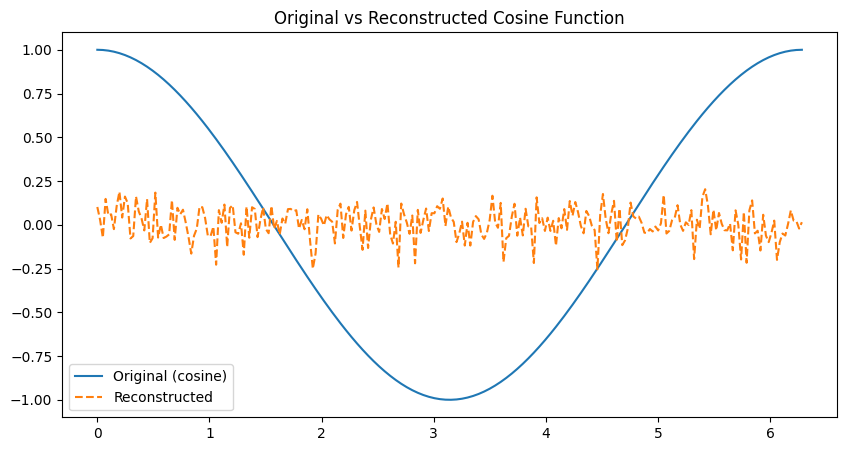

In [36]:
x = torch.linspace(0, 2*torch.pi, 256)
y = torch.cos(x).unsqueeze(1)
vae.eval()
with torch.no_grad():
    reconstructed, _, _ = vae(y)

# Plot original vs reconstructed
plt.figure(figsize=(10, 5))
plt.plot(x, y.squeeze(), label='Original (cosine)')
plt.plot(x, reconstructed.squeeze(), label='Reconstructed', linestyle='dashed')
plt.legend()
plt.title('Original vs Reconstructed Cosine Function')
plt.show()
